In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (2).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000112.png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (4).png
/kaggle/input/chest-cts

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## FDCT 데이터 불러옴

In [20]:
from torchvision import datasets, transforms
import torch
import os
from PIL import Image

In [21]:
# 이미지를 텐서로 변환
data_transform = transforms.Compose([
    transforms.ToTensor()
])

In [22]:
data_dirs = {
    "train": "/kaggle/input/chest-ctscan-images/Data/train",
    "test": "/kaggle/input/chest-ctscan-images/Data/test",
    "valid": "/kaggle/input/chest-ctscan-images/Data/valid"
}

In [23]:
first_path = os.path.join("/kaggle/input/chest-ctscan-images/Data/train", os.listdir("/kaggle/input/chest-ctscan-images/Data/train")[0])

image_path = os.path.join(first_path, os.listdir(first_path)[0])

image = Image.open(image_path)
print(f"첫 번째 이미지 크기 = {image.size}")

첫 번째 이미지 크기 = (426, 288)


In [24]:
second_path = os.path.join("/kaggle/input/chest-ctscan-images/Data/train", os.listdir("/kaggle/input/chest-ctscan-images/Data/train")[1])

image_path2 = os.path.join(second_path, os.listdir(second_path)[1])

image2 = Image.open(image_path2)
print(f"두 번째 이미지 크기 = {image2.size}")

두 번째 이미지 크기 = (441, 341)


In [25]:
image_sizes = []

for split, path in data_dirs.items():  
    for root, dirs, files in os.walk(path):  
        for file in files:
            if file.endswith((".png", ".jpg")): 
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)

# 고유한 이미지 크기 출력
unique_sizes = set(image_sizes)
print(f"데이터셋 내 고유한 이미지 크기: {unique_sizes}")

데이터셋 내 고유한 이미지 크기: {(434, 261), (309, 248), (396, 216), (413, 305), (425, 279), (413, 323), (388, 248), (417, 284), (385, 313), (437, 262), (409, 280), (847, 533), (377, 220), (338, 238), (366, 229), (418, 267), (437, 280), (315, 245), (432, 174), (400, 240), (415, 341), (429, 285), (410, 253), (442, 322), (414, 251), (450, 335), (350, 248), (459, 402), (419, 329), (385, 196), (388, 369), (498, 402), (432, 277), (423, 308), (377, 350), (401, 317), (464, 355), (364, 249), (435, 300), (345, 245), (476, 356), (668, 517), (436, 292), (345, 272), (428, 288), (457, 324), (425, 301), (488, 339), (358, 220), (429, 271), (440, 271), (438, 338), (357, 264), (216, 136), (450, 303), (414, 228), (421, 276), (462, 277), (338, 269), (427, 319), (479, 357), (461, 330), (422, 259), (439, 339), (374, 182), (372, 249), (425, 404), (362, 226), (390, 297), (475, 341), (384, 232), (454, 318), (460, 389), (376, 228), (372, 276), (376, 237), (413, 286), (395, 259), (370, 324), (416, 291), (417, 256), (435, 31

In [26]:
# 224x224로 해보고 괜찮으면 512로 바꾸자  

data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
 

]) 

In [27]:
train_data = datasets.ImageFolder(root="/kaggle/input/chest-ctscan-images/Data/train",
                                  transform=data_transform, 
                                  target_transform=None) 

test_data = datasets.ImageFolder(root="/kaggle/input/chest-ctscan-images/Data/test",
                                 transform=data_transform)


validation_data = datasets.ImageFolder(root="/kaggle/input/chest-ctscan-images/Data/valid",
                                 transform=data_transform)
train_data, test_data ,validation_data

(Dataset ImageFolder
     Number of datapoints: 613
     Root location: /kaggle/input/chest-ctscan-images/Data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.7)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 315
     Root location: /kaggle/input/chest-ctscan-images/Data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.7)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 72
     Root location: /kaggle/input/chest-ctscan-images/Data/valid
   

In [28]:
train_data[np.random.randint(0 , len(train_data))]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 3)

In [29]:
len(train_data)  , len(test_data)

(613, 315)

In [30]:
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [31]:
class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [32]:
# LDCT 데이터를 저장할 경로
ldct_save_dir = "/kaggle/working/ldct_data"
os.makedirs(ldct_save_dir, exist_ok=True)

In [33]:
dose_reduction_factor = 0.25

In [34]:
# FDCT -> LDCT 변환 및 저장
for split, path in data_dirs.items():  # train, test, valid 각각 처리
    dataset = datasets.ImageFolder(root=path, transform=data_transform)
    
    split_save_dir = os.path.join(ldct_save_dir, split)
    os.makedirs(split_save_dir, exist_ok=True)

    for i, (image_tensor, label) in enumerate(dataset):
        # FDCT 데이터를 NumPy 배열로 변환 (12-bit 데이터 가정)
        fdct_image = (image_tensor.numpy() * 4095).astype(np.float32)  # 12-bit 값으로 변환
        ldct_image = np.random.poisson(fdct_image * dose_reduction_factor).astype(np.uint16)  # 푸아송 노이즈 추가

        # 배열의 순서 변경 (C x H x W -> H x W x C)
        ldct_image = np.transpose(ldct_image, (1, 2, 0))

        # PIL 이미지를 생성
        ldct_image_pil = Image.fromarray(ldct_image, mode="I;16")  # 16-bit 이미지를 저장

        # 클래스별 디렉토리 생성 및 저장
        class_name = dataset.classes[label]
        class_dir = os.path.join(split_save_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        ldct_image_pil.save(os.path.join(class_dir, f"image_{i}.png"))

    print(f"{split} 데이터 변환 및 저장 완료: {split_save_dir}")

train 데이터 변환 및 저장 완료: /kaggle/working/ldct_data/train
test 데이터 변환 및 저장 완료: /kaggle/working/ldct_data/test
valid 데이터 변환 및 저장 완료: /kaggle/working/ldct_data/valid


In [35]:
for split in ["train", "test", "valid"]:
    split_save_dir = os.path.join(ldct_save_dir, split)
    if os.path.exists(split_save_dir):
        print(f"\n{split} directory found: {split_save_dir}")
        for class_name in os.listdir(split_save_dir):
            class_path = os.path.join(split_save_dir, class_name)
            files = os.listdir(class_path)
            print(f"Class: {class_name}, Number of files: {len(files)}, Example file: {files[0]}")
    else:
        print(f"{split} directory 없다 넌 좆됏다")


train directory found: /kaggle/working/ldct_data/train
Class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Number of files: 195, Example file: image_30.png
Class: normal, Number of files: 148, Example file: image_375.png
Class: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Number of files: 155, Example file: image_580.png
Class: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Number of files: 115, Example file: image_241.png

test directory found: /kaggle/working/ldct_data/test
Class: large.cell.carcinoma, Number of files: 51, Example file: image_157.png
Class: normal, Number of files: 54, Example file: image_201.png
Class: squamous.cell.carcinoma, Number of files: 90, Example file: image_241.png
Class: adenocarcinoma, Number of files: 120, Example file: image_30.png

valid directory found: /kaggle/working/ldct_data/valid
Class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Number of files: 23, Example file: image_4.png
Class: normal, Number of files: 13, Example file: image_47.png
Cl

## 변환된 이미지 시각화

In [36]:
ldct_data_dirs = {
    "train": "/kaggle/working/ldct_data/train",
    "test": "/kaggle/working/ldct_data/test",
    "valid": "/kaggle/working/ldct_data/valid"
}

In [37]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor()         
])

In [38]:
ldct_train_data = datasets.ImageFolder(root=ldct_data_dirs["train"], transform=data_transform)
ldct_test_data = datasets.ImageFolder(root=ldct_data_dirs["test"], transform=data_transform)
ldct_valid_data = datasets.ImageFolder(root=ldct_data_dirs["valid"], transform=data_transform)

print(f"LDCT Train Data: {len(ldct_train_data)} images")
print(f"LDCT Test Data: {len(ldct_test_data)} images")
print(f"LDCT Valid Data: {len(ldct_valid_data)} images")

LDCT Train Data: 613 images
LDCT Test Data: 315 images
LDCT Valid Data: 72 images


In [39]:
ldct_image, label = ldct_train_data[0]
class_name = ldct_train_data.classes[label]

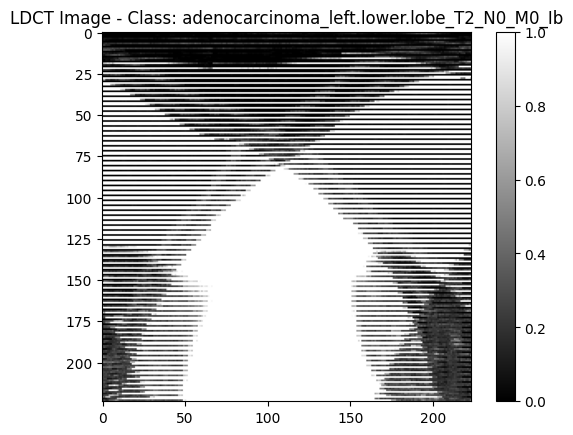

In [40]:
plt.imshow(ldct_image.permute(1, 2, 0), cmap="gray")
plt.title(f"LDCT Image - Class: {class_name}")
plt.colorbar()
plt.show()

## FDCT, LDCT 데이터 다운로드 

In [41]:
import shutil
from IPython.display import HTML

In [42]:
fdct_zip_path = "/kaggle/working/fdct_data.zip"
ldct_zip_path = "/kaggle/working/ldct_data.zip"

In [43]:
shutil.make_archive(fdct_zip_path.replace(".zip", ""), "zip", "/kaggle/input/chest-ctscan-images/Data")
shutil.make_archive(ldct_zip_path.replace(".zip", ""), "zip", "/kaggle/working/ldct_data")

'/kaggle/working/ldct_data.zip'